In [0]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [0]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
#line1-------------
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
Iris=pd.read_csv(url, error_bad_lines=False)
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
Iris.shape

(150, 5)

In [0]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
Iris=pd.read_csv(url, error_bad_lines=False)
Iris = Iris.loc[(Iris['species'] == 'setosa')|(Iris['species'] == 'versicolor')]
Iris.shape

(100, 5)

In [0]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris[:50]
Iris=Iris.replace(to_replace="setosa",value=0) #change setosa to 0 and save it 
Iris[51:100]
Iris=Iris.replace(to_replace="versicolor",value=1) #change versicolor to 1 and save it





In [0]:

Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


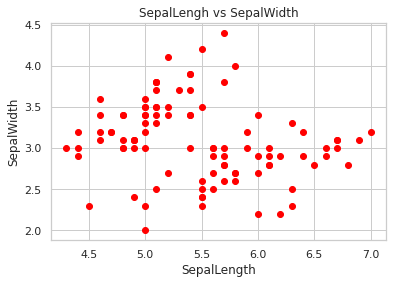

In [0]:
#visualization of given dataset
#codesegment4------------------
x=Iris.sepal_length
y=Iris.sepal_width
plt.scatter(x,y,c='red')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.title('SepalLengh vs SepalWidth')
plt.show()


In [0]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [0]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow

# set for reproducible results
seed = 5
#line5-------------
np.random.seed(seed)
tf.random.set_seed(seed)
#line6-------------
# x is your dataset
Iris = np.random.rand(100, 5)
indices = np.random.permutation(Iris.shape[0])
train_index, test_index = indices[:80], indices[80:]
training, test = Iris[train_index,:], Iris[test_index,:]
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
test_index = np.array(list(set(range(len(X))) - set(train_index)))
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [0]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [0]:

# Define the min-max normalization function
def min_max_normalized(Iris): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8------------------
    min = np.min(Iris)
    max = np.max(Iris)
    range = max - min

    return [(a - min) / range for a in Iris]
normalised=min_max_normalized(Iris)  
print(normalised)   

[array([0.22202483, 0.8719775 , 0.20672224, 0.91994567, 0.48894121]), array([0.61250459, 0.76695697, 0.51900414, 0.29697209, 0.18768877]), array([0.08050869, 0.73943803, 0.44175113, 0.15822239, 0.88119945]), array([0.27421556, 0.41462628, 0.29625018, 0.62958052, 0.58053886]), array([0.60066783, 0.26593275, 0.28483481, 0.25367896, 0.32779308]), array([0.14405037, 0.16553905, 0.96535007, 0.96163932, 0.1883835 ]), array([0.02396842, 0.20455458, 0.70076914, 0.78058915, 0.02259238]), array([0.57835984, 0.00126163, 0.51605325, 0.64060838, 0.98708452]), array([0.25919866, 0.80361444, 0.87172782, 0.92409212, 0.00183474]), array([0.469983  , 0.98292108, 0.39930747, 0.81487105, 0.5470951 ]), array([0.77191245, 0.48545459, 0.02878241, 0.08630393, 0.11127869]), array([0.25133149, 0.96633667, 0.63256424, 0.81780425, 0.56675731]), array([0.6361611 , 0.81303754, 0.92803248, 0.91395033, 0.82597002]), array([0.09399534, 0.36134019, 0.03519185, 0.54699677, 0.79724839]), array([0.05085486, 0.18863705, 0.

In [0]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9----------------------------
array=np.array(Iris,dtype=float)
 #weights
arr_T=np.transpose(array)
b = tf.Variable(tf.random.normal(shape=[1, 1])) #bias
#constructor for random initialization

a=(np.dot(arr_T,X)+b)
#line10

init=tf.compat.v1.global_variables_initializer(a)
sess = tf.compat.v1.Session()
sess.run(init)
print(sess.run(a))

TypeError: ignored

In [0]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])
#The difference is that with tf.Variable you have to provide an initial value when you declare it.
# With tf.placeholder you don't have to provide an initial value and
# you can specify it at run time with the feed_dict argument inside Session.run

AttributeError: ignored

In [0]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
#we use logistic regression model to do this

In [0]:
# Declare loss function
loss=0.5*(a-target)^2
# Use the sigmoid cross-entropy loss function,
cost=1/(1+e^-a)
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [0]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
#line12--------------------------------
alpha=0.001
#batch_size---- #using batch makes the training ------?
#line13--------------------------------
#iter_num

In [0]:
# Define the optimizer with name opt
#line14-----------------------------
# Define the goal
goal = opt.minimize(loss)

In [0]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [0]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [0]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ #randomnly picks up up 30 sample data from the train_X
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    #line16---------------------------
    # recode the results of loss and train accuracy
    #codesegment17---------------------
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))
#Write the command to calculate test accuracy:
#line18-------------------------------
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.305716 train_acc: 0.862500
epoch:  200 loss: 0.144971 train_acc: 1.000000
epoch:  300 loss: 0.157285 train_acc: 1.000000
epoch:  400 loss: 0.150482 train_acc: 1.000000
epoch:  500 loss: 0.138670 train_acc: 1.000000
epoch:  600 loss: 0.112889 train_acc: 1.000000
epoch:  700 loss: 0.119393 train_acc: 1.000000
epoch:  800 loss: 0.128287 train_acc: 1.000000
epoch:  900 loss: 0.116138 train_acc: 1.000000
epoch: 1000 loss: 0.086197 train_acc: 1.000000
epoch: 1100 loss: 0.104485 train_acc: 1.000000
epoch: 1200 loss: 0.084130 train_acc: 1.000000
epoch: 1300 loss: 0.091043 train_acc: 1.000000
epoch: 1400 loss: 0.088923 train_acc: 1.000000
epoch: 1500 loss: 0.081059 train_acc: 1.000000
The test accuracy is: 1.000000


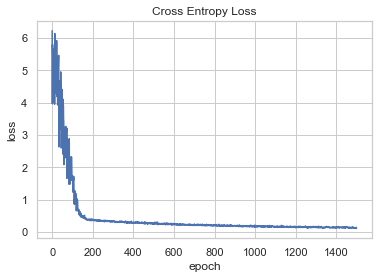

In [0]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.show()

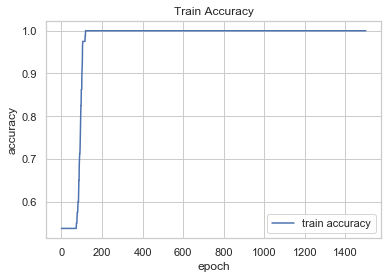

In [0]:
# plot for training accuracy
#codesegment20---------------------------
plt.show()